### Mini Batch Task 01

- 다이아몬드의 특성을 회귀분석하여 예상 가격을 예측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
d_df = d_df.drop(labels=['Unnamed: 0'], axis = 1)

In [3]:
d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [4]:
d_df.cut.value_counts()

cut
Ideal        21551
Premium      13793
Very Good    12083
Good          4906
Fair          1610
Name: count, dtype: int64

In [5]:
d_df.color.value_counts()

color
G    11292
E     9799
F     9543
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [6]:
d_df.clarity.value_counts()

clarity
SI1     13067
VS2     12259
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder


pre_d_df = d_df.copy()
columns = ['cut', 'clarity']
label_encoders = {}

for column in columns:
    encoder = LabelEncoder()
    result = encoder.fit_transform(pre_d_df[column])
    label_encoders[column] = encoder.classes_
    pre_d_df[column] = result

label_encoders

{'cut': array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 'clarity': array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)}

In [8]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43


In [9]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
one_hot_encoder = OneHotEncoder(sparse_output=False)
result = one_hot_encoder.fit_transform(pre_d_df[['color']])
result = result.astype(np.int8)

In [10]:
pre_d_df = pd.concat([pre_d_df, pd.DataFrame(result, columns=one_hot_encoder.categories_)], axis = 1)

In [11]:
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z,"(D,)","(E,)","(F,)","(G,)","(H,)","(I,)","(J,)"
0,0.23,2,E,3,61.5,55.0,326,3.95,3.98,2.43,0,1,0,0,0,0,0
1,0.21,3,E,2,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,0,0
2,0.23,1,E,4,56.9,65.0,327,4.05,4.07,2.31,0,1,0,0,0,0,0
3,0.29,3,I,5,62.4,58.0,334,4.20,4.23,2.63,0,0,0,0,0,1,0
4,0.31,1,J,3,63.3,58.0,335,4.34,4.35,2.75,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,3,H,3,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,0,1,0,0
53939,0.75,2,D,3,62.2,55.0,2757,5.83,5.87,3.64,1,0,0,0,0,0,0
53940,0.71,3,E,2,60.5,55.0,2756,5.79,5.74,3.49,0,1,0,0,0,0,0
53941,0.71,3,F,2,59.8,62.0,2756,5.74,5.73,3.43,0,0,1,0,0,0,0


In [12]:
pre_d_df = pre_d_df.drop(labels=['color'],axis=1)

In [13]:
pre_d_df.columns=['carat','cut','clarity','depth','table','price','x','y','z','D','E','F','G','H','I','J']

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'G'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'I'}>, <Axes: title={'center': 'J'}>]],
      dtype=object)

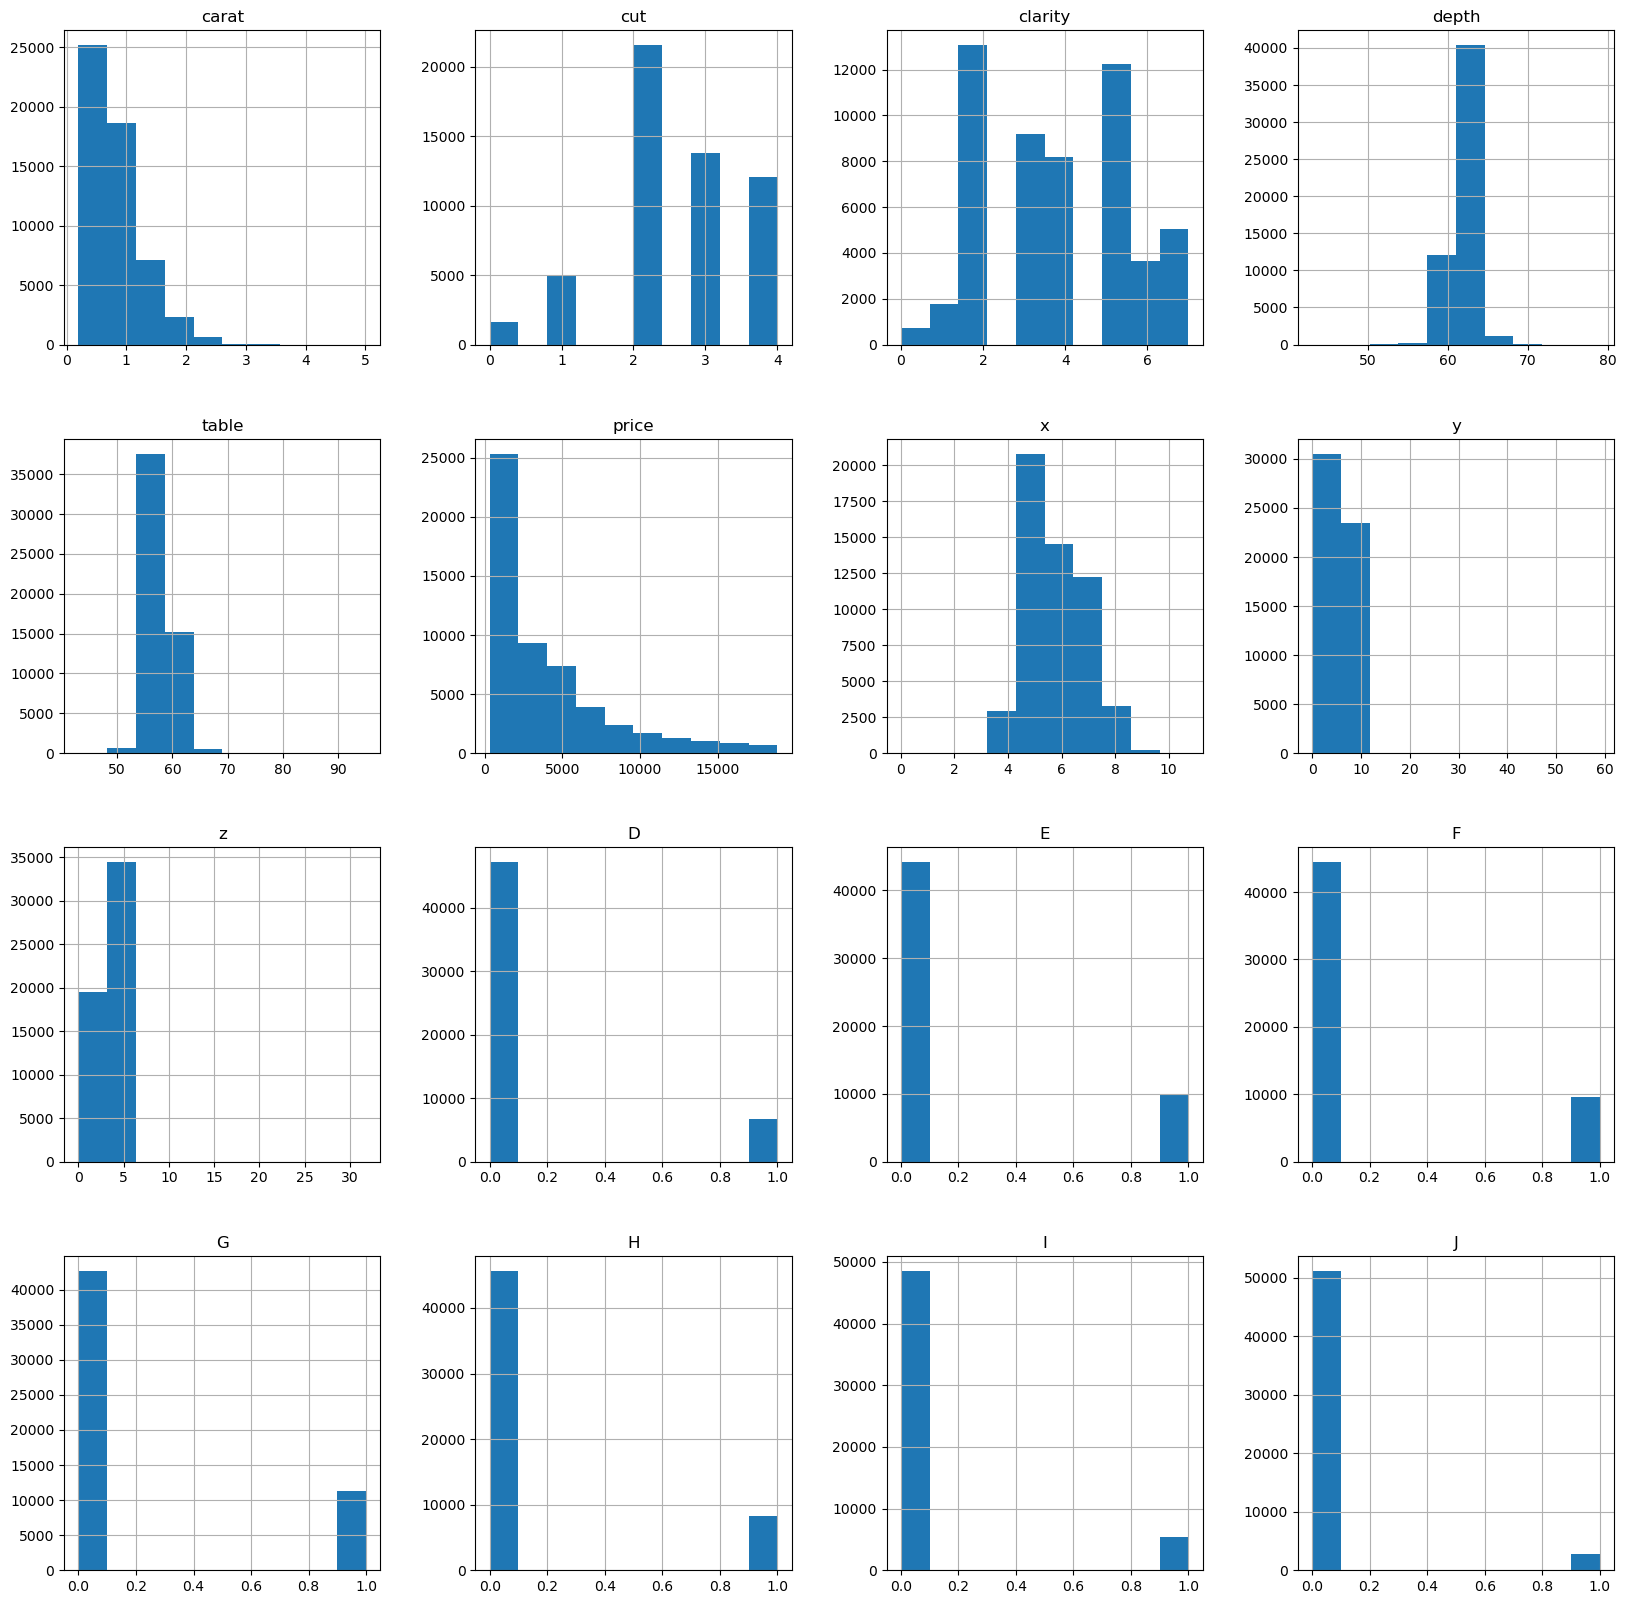

In [14]:
pre_d_df.hist(figsize=(20,20))

In [15]:
pre_d_df.loc[:,'price']=np.log1p(pre_d_df.price)

array([[<Axes: title={'center': 'carat'}>,
        <Axes: title={'center': 'cut'}>,
        <Axes: title={'center': 'clarity'}>,
        <Axes: title={'center': 'depth'}>],
       [<Axes: title={'center': 'table'}>,
        <Axes: title={'center': 'price'}>, <Axes: title={'center': 'x'}>,
        <Axes: title={'center': 'y'}>],
       [<Axes: title={'center': 'z'}>, <Axes: title={'center': 'D'}>,
        <Axes: title={'center': 'E'}>, <Axes: title={'center': 'F'}>],
       [<Axes: title={'center': 'G'}>, <Axes: title={'center': 'H'}>,
        <Axes: title={'center': 'I'}>, <Axes: title={'center': 'J'}>]],
      dtype=object)

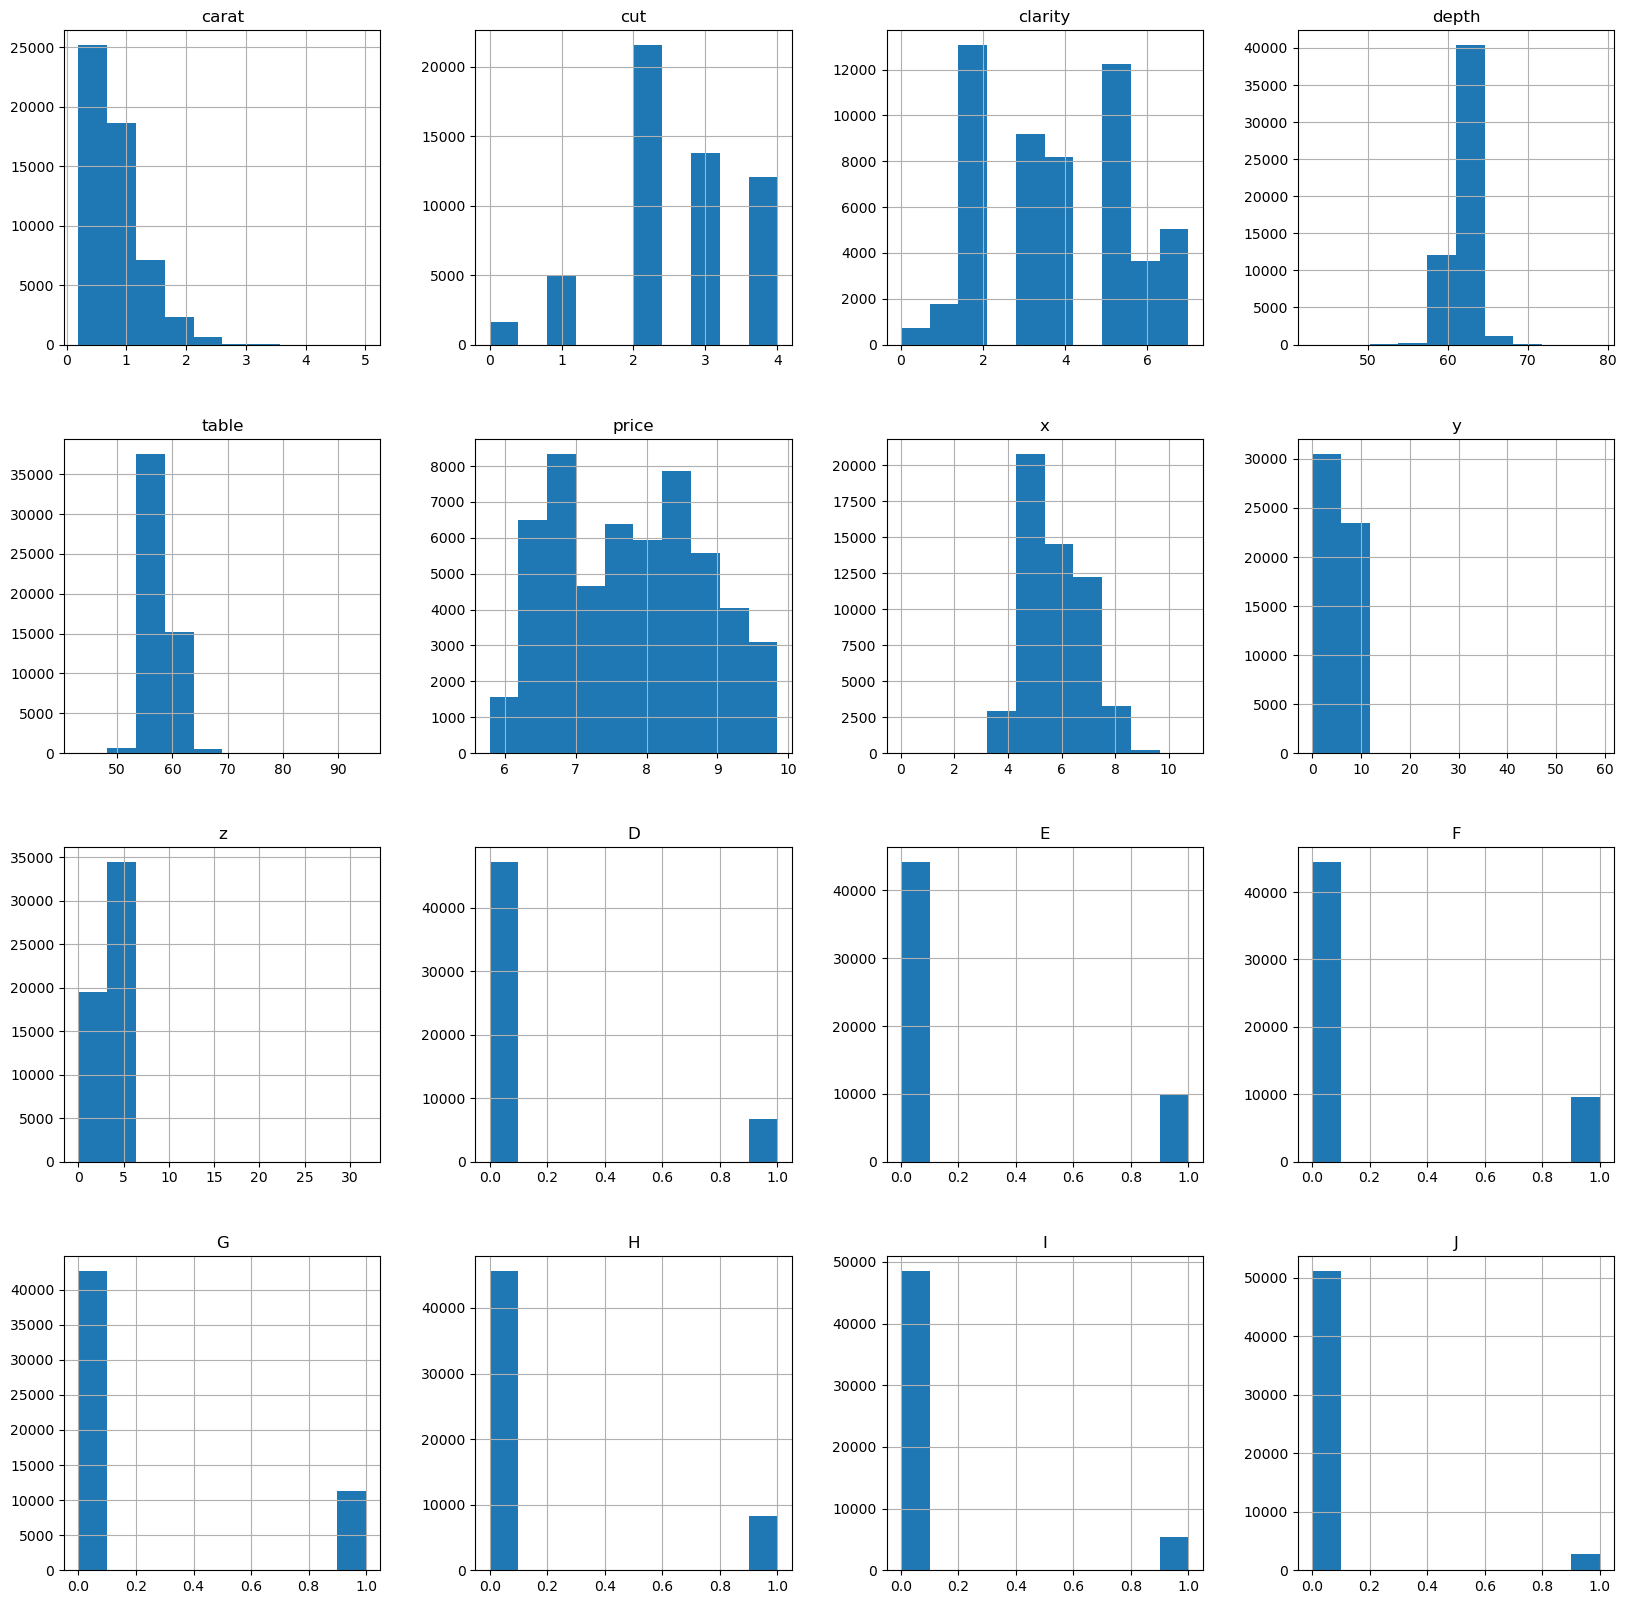

In [16]:
pre_d_df.hist(figsize=(20,20))

In [17]:
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

x          0.958027
y          0.936190
z          0.935233
carat      0.920252
table      0.158203
J          0.082972
I          0.077838
H          0.055371
cut        0.022905
G          0.001424
depth      0.000852
F         -0.011124
D         -0.063466
E         -0.096278
clarity   -0.120026
Name: price, dtype: float64

In [18]:
pre_d_df = pre_d_df.loc[:, ['carat', 'x', 'y', 'z','price']]

In [19]:
pre_d_df

,carat,x,y,z,price
0,0.23,3.95,3.98,2.43,5.789960
1,0.21,3.89,3.84,2.31,5.789960
2,0.23,4.05,4.07,2.31,5.793014
3,0.29,4.20,4.23,2.63,5.814131
4,0.31,4.34,4.35,2.75,5.817111
...,...,...,...,...,...
53938,0.86,6.15,6.12,3.74,7.922261
53939,0.75,5.83,5.87,3.64,7.922261
53940,0.71,5.79,5.74,3.49,7.921898
53941,0.71,5.74,5.73,3.43,7.921898


In [26]:
from sklearn.model_selection import train_test_split
import numpy as np
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from torch.utils.data import TensorDataset, DataLoader

torch.manual_seed(124)

features, targets = pre_d_df.iloc[:, :-1], pre_d_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=124)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

td = TensorDataset(X_train, y_train)
dl = DataLoader(td, batch_size=1000, shuffle=True)

l_r = Linear(4, 1)

optimizer = SGD(l_r.parameters(), lr=0.0001)

epochs = 1000

for epoch in range(1, epochs + 1):
    for i, samples in enumerate(dl):
        
        X_train, y_train = samples

        H = l_r(X_train)
        loss = mse_loss(H, y_train)
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f'Epoch: {epoch}/{epochs}, Batch: {i + 1}/{len(dl)}, ', end='')
            for i, w in enumerate(list(l_r.parameters())[0][0]):
                print(f'W{i + 1}: {np.round(w.item(), 4)}, ', end='')
            print(f'b: {np.round(list(l_r.parameters())[1].item(), 4)}')
            print(f'loss: {np.round(loss.item(), 4)}')

Epoch: 100/1000, Batch: 1/44, W1: -0.399, W2: 0.5195, W3: 0.7229, W4: 0.2163, b: 0.1452
loss: 0.211
Epoch: 100/1000, Batch: 2/44, W1: -0.399, W2: 0.5194, W3: 0.7229, W4: 0.2163, b: 0.1453
loss: 0.2187
Epoch: 100/1000, Batch: 3/44, W1: -0.3991, W2: 0.5194, W3: 0.7229, W4: 0.2163, b: 0.1453
loss: 0.2157
Epoch: 100/1000, Batch: 4/44, W1: -0.3991, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1453
loss: 0.2205
Epoch: 100/1000, Batch: 5/44, W1: -0.3991, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1453
loss: 0.2046
Epoch: 100/1000, Batch: 6/44, W1: -0.3991, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1453
loss: 0.2069
Epoch: 100/1000, Batch: 7/44, W1: -0.3991, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1453
loss: 0.2123
Epoch: 100/1000, Batch: 8/44, W1: -0.3992, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1454
loss: 0.203
Epoch: 100/1000, Batch: 9/44, W1: -0.3992, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1454
loss: 0.2163
Epoch: 100/1000, Batch: 10/44, W1: -0.3992, W2: 0.5195, W3: 0.723, W4: 0.2163, b: 0.1454
los

In [21]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error

def get_evaluation(y_test, prediction):
    MSE = mean_squared_error(y_test, prediction)
    RMSE = np.sqrt(MSE)
    MSLE = mean_squared_log_error(y_test, prediction)
    RMSLE = np.sqrt(mean_squared_log_error(y_test, prediction))
    print('MSE: {:.4f}, RMSE: {:.4f}, MSLE: {:.4f}, RMSLE: {:.4f}'\
          .format(MSE, RMSE, MSLE, RMSLE))

In [22]:
y_test = y_test.detach().numpy()

H = l_r(X_test)
prediction = H.detach().numpy()

In [25]:
MSE = mean_squared_error(y_test, prediction)
RMSE = np.sqrt(MSE)
print('MSE: {:.4f}, RMSE: {:.4f}'\
    .format(MSE, RMSE))

MSE: 0.3789, RMSE: 0.6156


### OLS (Ordinary Least Square)

- 최소 제곱법, 또는 최소 자승법, 최소제곱 근사법, 최소자승 근자법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형회귀 모델을 평가하는데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 통계 테스트를 수행하는 클래스 여러 개와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.

- P > |t| (p-value) : 해당 독립변수가 0.05보다 작으면, 종속변수에 영향을 미치는 것이 유의미하다라는 것을 뜻한다.
- Durbin-Watson: 보통 1.5~2.5 사이라면 독립으로 판단하고, 회귀 모형이 적합하다는 것을 의미한다.
- R - squared = R<sub>2</sub>값을 유지 또는 개선하는 방향으로만 수행해야 한다.(1에 가까울 수록 적합한 수치)

In [ ]:
import statsmodels as sm


### VIF (Variance Inflation Factor)

- 분산 팽창 요인수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.

<img src='./images/multicollinearity.png'>